<h1 style="color:red"> <center>Case Study on H1N1 vaccine Prediction </center></h1>

## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## read csv file

In [2]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

## extract data

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


## Basic information of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

<b style="color:red">Insights</b>
<p><b> (1)there is null data presented in dataset.<br>
(2)there is also mistmatch columns data and their datatype in columns.<br>
(3)In above dataset, 2607 records and 34 columns<b></p>

## Handles Null Values

In [5]:
key=df.columns
value=df.isnull().sum()/len(df)*100

In [6]:
for k,v in zip(key,value):
    if v>40:
        df.drop(k,axis=1,inplace=True)
    elif v<40 and v>1:
        if df[k].dtype=='object':
            df[k]=df[k].fillna(df[k].mode()[0])
        else:
            df[k]=df[k].fillna(df[k].mean())

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()/len(df)*100

unique_id                    0.0
h1n1_worry                   0.0
h1n1_awareness               0.0
antiviral_medication         0.0
contact_avoidance            0.0
bought_face_mask             0.0
wash_hands_frequently        0.0
avoid_large_gatherings       0.0
reduced_outside_home_cont    0.0
avoid_touch_face             0.0
dr_recc_h1n1_vacc            0.0
dr_recc_seasonal_vacc        0.0
chronic_medic_condition      0.0
cont_child_undr_6_mnths      0.0
is_health_worker             0.0
is_h1n1_vacc_effective       0.0
is_h1n1_risky                0.0
sick_from_h1n1_vacc          0.0
is_seas_vacc_effective       0.0
is_seas_risky                0.0
sick_from_seas_vacc          0.0
age_bracket                  0.0
qualification                0.0
race                         0.0
sex                          0.0
income_level                 0.0
marital_status               0.0
housing_status               0.0
employment                   0.0
census_msa                   0.0
no_of_adul

## format data

In [9]:
df["race"].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [10]:
df['income_level'].unique()

array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
      dtype=object)

In [11]:
df['income_level']=df['income_level'].replace('<= $75,000, Above Poverty','Above Poverty')

In [12]:
df['income_level']=df['income_level'].replace('> $75,000','Rich')

In [13]:
df['qualification'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College'],
      dtype=object)

In [14]:
df['qualification']=df.get('qualification').replace('Some College','Nongraduate')
df['qualification']=df.get('qualification').replace('12 Years','Nongraduate')
df['qualification']=df.get('qualification').replace('< 12 Years','Nongraduate')
df.qualification.unique()

array(['Nongraduate', 'College Graduate'], dtype=object)

## Exploratory Data Analysis(EDA)

<AxesSubplot:xlabel='age_bracket', ylabel='count'>

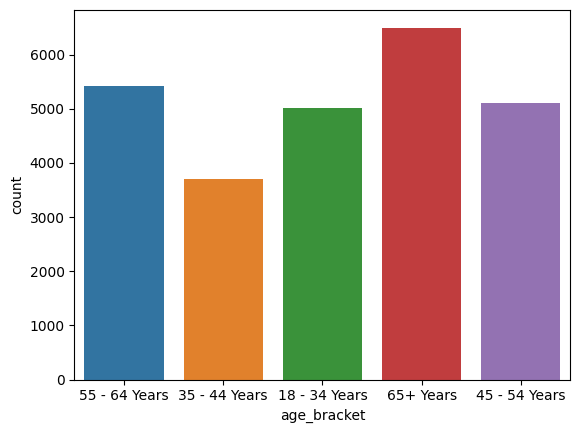

In [15]:
sns.countplot(df.age_bracket)

<AxesSubplot:xlabel='qualification', ylabel='count'>

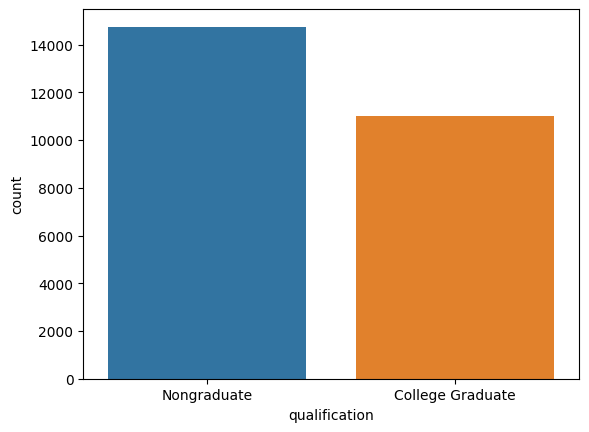

In [16]:
sns.countplot(df.qualification) 

<AxesSubplot:xlabel='race', ylabel='count'>

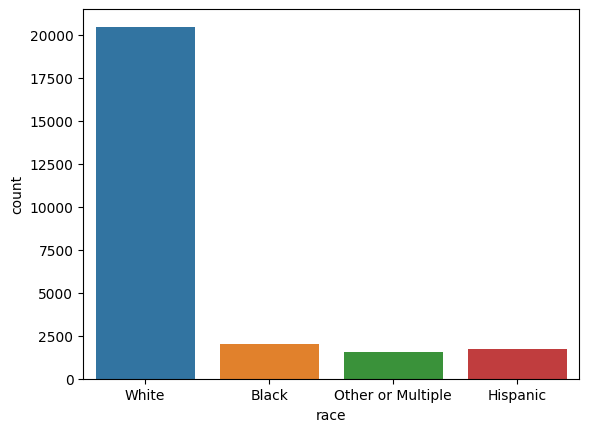

In [17]:
sns.countplot(df.race)

<AxesSubplot:xlabel='income_level', ylabel='count'>

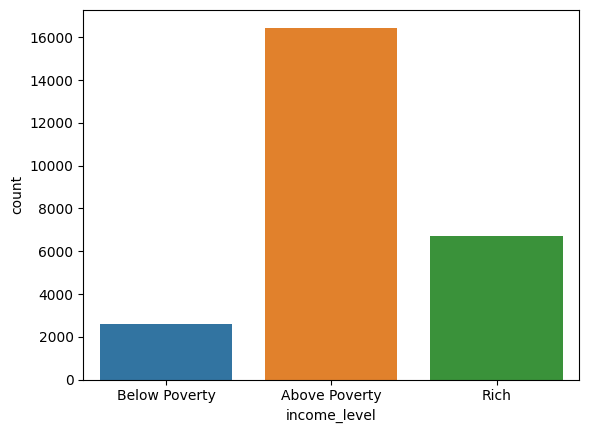

In [18]:
sns.countplot(df.income_level)

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

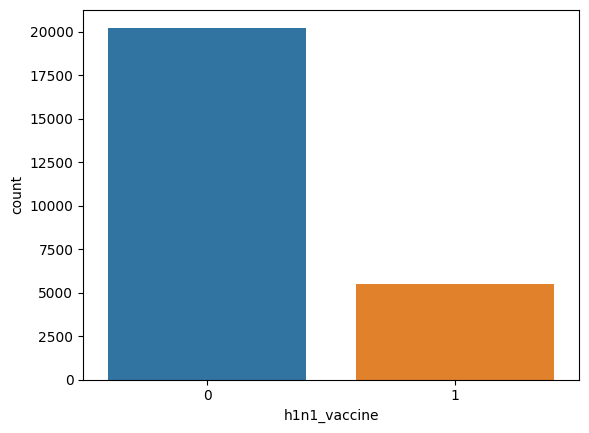

In [19]:
sns.countplot(df.h1n1_vaccine) 

<b style="color:red">Insights</b>
<p><b> (1)H1N1 vaccine column is imbalanced data<b></p>

## Encoding:-Change the catagorical columns into numerical columns

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [23]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [24]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

## define Independent(X) and Dependent(y) Variable

In [25]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [52]:
x

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1,3,0,1,1,0,1,2,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,3,1,1,1,1,0,0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,3,1,0,1,0,0,0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,3,0,1,1,1,1,1,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,3,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,3,0,2,1,1,1,1,3.0,0.0
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,3,0,0,1,0,1,2,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,3,1,0,1,1,0,1,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1,3,0,0,1,0,0,0,0.0,0.0


In [53]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26701    0
26702    0
26703    0
26704    0
26706    0
Name: h1n1_vaccine, Length: 25747, dtype: int64

## Split the data into train and test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [28]:
x_train.shape

(20597, 32)

In [29]:
x_test.shape

(5150, 32)

In [30]:
y_train.shape

(20597,)

In [31]:
y_test.shape

(5150,)

<b style="color:red">Insights</b>
<p><b>(1)x variable is for independent data and y variable is for dependent(target) data.<br> (2)5150 recodrds for test data and 20597 records for train data.<b></p>

## Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()

In [34]:
x_train=sc.fit_transform(x_train)

In [35]:
x_test=sc.transform(x_test)

## Model Building:- Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
reg=LogisticRegression()

In [38]:
reg.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred_train=reg.predict(x_train)

In [40]:
y_pred_test=reg.predict(x_test)

## Find Accuracy Score

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print('Train Data')
print(accuracy_score(y_train,y_pred_train))

Train Data
0.8341506044569598


In [43]:
print('Test Data')
print(accuracy_score(y_test,y_pred_test))

Test Data
0.8328155339805825


## Find Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
print('Train Data')
print(confusion_matrix(y_train,y_pred_train))
print('Test Data')
print(confusion_matrix(y_test,y_pred_test))

Train Data
[[15345   858]
 [ 2558  1836]]
Test Data
[[3822  223]
 [ 638  467]]


## Cross Validation Score

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
reg_score=cross_val_score(reg,x,y,scoring='accuracy',cv=5)

In [48]:
reg_score

array([0.80932039, 0.81300971, 0.81549815, 0.81841134, 0.80928336])

In [49]:
mean_reg_score=np.mean(reg_score)

In [50]:
mean_reg_score

0.8131045900137079